# Espacio de trabajo y preprocesamiento
Importar paquetes y dejar la base READY

In [1]:
# Paquetes visuales y básicos
import numpy as np
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
try:
    import seaborn
except:
    pass
import sys
import pandas as pd
from pprint import pprint
import re
import logging
from datetime import datetime
from io import BytesIO
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
# Paquetes MARKOV, AUTOREGRESIVOS E INFERENCIA
import requests
import statsmodels.api as sm
from scipy import stats
import tqdm
from tqdm.notebook import tqdm

In [2]:
# Base de datos mensajes 2020
base_2020 = pd.read_excel(r'C:\Users\JOSE\Desktop\Trabajo\BX\Supervisado\Base_semanal_pegada.xlsx')
base_2020

,Unnamed: 0,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,...,Categoría_Barometro_v4_-_Denuncia_Xenofobia,Categoría_Barometro_v4_-_Xenofobia,Categorías_prueba_-_Denuncia,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia,Clean_text
0,0,2020-01-08 23:59:57.0,Justamente le acabe el guacamole picante al ve...,twitter.com,neutral,COL.Bogota.Bogota,individual,Hector_Jk7,Bogota,male,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,Justamente le acabe el guacamole picante al ve...
1,2,2020-01-08 23:59:20.0,...1141486160931430407] El seleccionado catarí...,vanguardia.com,neutral,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,"..1141486160931430407] El seleccionado catarí,..."
2,4,2020-01-08 23:58:10.0,@NTN24ve EL QUE NO SABE CON QUIEN SE METE ES L...,twitter.com,positive,COL.Antioquia.Medellin,individual,LeilaLozano3,Medellin,female,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,@NTN24ve EL QUE NO SABE CON QUIEN SE METE ES L...
3,5,2020-01-08 23:55:42.0,@NoticiasCaracol Los venezolanos siempre esper...,twitter.com,negative,COL.Antioquia.Medellin,individual,0rwell07,Medellin,male,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@NoticiasCaracol Los venezolanos siempre esper...
4,7,2020-01-08 23:54:14.0,Los 6 puntos q trata la cartica denota su prox...,twitter.com,neutral,COL.Bogota.Bogota,individual,PartidoRepubl14,Bogota,unknown,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,Los 6 puntos q trata la cartica denota su prox...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350574,46995,2021-03-08 00:11:19.0,@yoligrilla @elespectador Y este gobierno colo...,twitter.com,neutral,NaN,individual,RamonEdo,NaN,unknown,...,NaN,NaN,NaN,NaN,NaN,X,NaN,X,NaN,@yoligrilla @elespectador Y este gobierno colo...
350575,46996,2021-03-08 00:10:35.0,"..., y de taquito se la sirvió a Yesus Cabrera...",primertiempo.co,negative,NaN,NaN,NaN,NaN,unknown,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,NaN,".., y de taquito se la sirvió a Yesus Cabrera...."
350576,47000,2021-03-08 00:07:01.0,"Eduardo Sosa, José David Barragán y José Luis ...",twitter.com,positive,COL.Bogota.Bogota,individual,riosgonzalezp,Bogota,male,...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,"Eduardo Sosa, José David Barragán y José Luis ..."
350577,47001,2021-03-08 00:05:02.0,La venezolana Jenny Camacho es la mente maestr...,twitter.com,neutral,COL.Bogota.Bogota,individual,dinersrevista,Bogota,unknown,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,La venezolana Jenny Camacho es la mente maestr...


In [3]:
df = base_2020[['xenofobia_e_Integración_-_Xenofobia','Date']]
df

,xenofobia_e_Integración_-_Xenofobia,Date
0,X,2020-01-08 23:59:57.0
1,NaN,2020-01-08 23:59:20.0
2,X,2020-01-08 23:58:10.0
3,NaN,2020-01-08 23:55:42.0
4,X,2020-01-08 23:54:14.0
...,...,...
350574,X,2021-03-08 00:11:19.0
350575,NaN,2021-03-08 00:10:35.0
350576,NaN,2021-03-08 00:07:01.0
350577,NaN,2021-03-08 00:05:02.0


In [4]:
df.rename(columns={'xenofobia_e_Integración_-_Xenofobia':'Xenofobia'}, inplace=True)
df.Date = pd.DatetimeIndex(df.Date, dtype='datetime64[ns]')
df['Xenofobia'] = df['Xenofobia'].replace(r'X',1,regex=True)
df['Xenofobia'] = df['Xenofobia'].fillna(0)
df = df.set_index('Date').groupby(pd.Grouper(freq='D')).sum()
df

C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\JOSE\AppData\Local\Temp/ipykernel_16604/898998045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Xenofobia
Date,
2020-01-01,71
2020-01-02,103
2020-01-03,94
2020-01-04,100
2020-01-05,97
...,...
2021-03-10,126
2021-03-11,1461
2021-03-12,1024


<AxesSubplot:title={'center':'Volumen de mensajes de Xenofobia ene 2020 - mar 2021'}, xlabel='Date'>

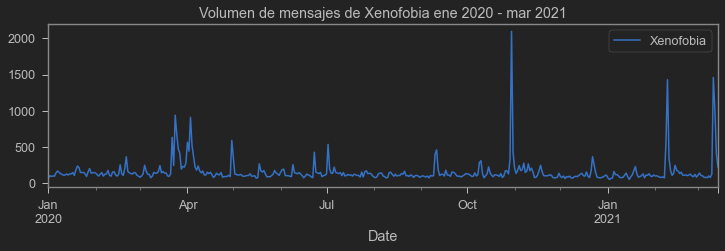

In [5]:
df.plot(title="Volumen de mensajes de Xenofobia ene 2020 - mar 2021", figsize=(12, 3))

In [11]:
df.sort_values(by="Xenofobia")

,Xenofobia
Date,
2021-01-02,50
2021-01-15,53
2020-12-04,64
2021-01-03,67
2020-05-16,70
...,...
2020-03-24,939
2021-03-12,1024
2021-02-09,1430


# Vamos a implementar varios modelos para encontrar picos de xenofobia
## Hamilton's seminal
1. Hamilton (1989) switching model: <br>
    1.1. Paper seminal de los modelos de Markov Switching en donde se puede predecir la aparición de un pico escribiendo un modelo autoregresivo de orden 4 con dos regímenes. <br>
    $$ y_t =  \mu_{S_t}  + \beta_1(y_{t-1} - \mu_{S_{t-1}}) + \beta_2(y_{t-2} - \mu_{S_{t-2}}) + \beta_3(y_{t-3} - \mu_{S_{t-3}}) + \beta_4(y_{t-4} - \mu_{S_{t-4}}) + \epsilon_t$$
    Para cada periodo, se detecta una transcición de régimen dada la siguiente matriz de transcición de probabilidades:
    $$ P(S_t = s_t|S_{t-1} = s_{t-1}) = \begin{bmatrix}
\rho_{00} & \rho_{10}\\
\rho_{01} & \rho_{11}
\end{bmatrix} $$
Donde $\rho_{ij}$ es la probabilidad de cambiar del régimen i al régimen j. Para encontrar una óptima probabilidad de transcición de régimen optimizamos por máxima verosimilitud, esto sucede gracias a la utilización del algoritmo EM y el algoritmo quasi-Newton (BFGS) para encontrar rápidamente el máximo una vez este en el óptimo step 2 del EM.

In [46]:
mod_hamilton = sm.tsa.MarkovAutoregression(
    df, k_regimes=2, order=4, switching_ar=False
)
res_hamilton = mod_hamilton.fit()

C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
res_hamilton.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                Xenofobia   No. Observations:                  435
Model:             MarkovAutoregression   Log Likelihood               -2651.434
Date:                  Sun, 24 Apr 2022   AIC                           5320.868
Time:                          03:37:33   BIC                           5357.546
Sample:                      01-01-2020   HQIC                          5335.344
                           - 03-14-2021                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -308.7513        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        990.0171        nan        nan        nan         nan         nan
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.066e+04        nan        nan        nan         nan         nan
ar.L1          0.5832      0.053     11.068      0.000       0.480       0.686
ar.L2          0.1838      0.059      3.099      0.002       0.068       0.300
ar.L3          0.0502      0.061      0.818      0.413      -0.070       0.170
ar.L4          0.1694      0.053      3.214      0.001       0.066       0.273
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9932      0.004    255.688      0.000       0.986       1.001
p[1->0]        1.0000        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 2.37e+20. Standard errors may be unstable.
"""

In [49]:
pprint(res_hamilton.expected_durations)
pprint("Esto quiere decir que un pico de xenofobia puede tardarse en llegar 148 días y solo dura un día")

array([148.133701,   1.      ])
('Esto quiere decir que un pico de xenofobia puede tardarse en llegar 148 días '
 'y solo dura un día')


## Kim, Nelson, y Startz (1998) Three-state Variance Switching
2. El modelo muestra una estimación con régimenes heteroscedásticos (cambiantes de varianzas) y sin aparición de efectos de media, esto quiere decir que el proceso generador de datos se distribuye normal con media 0 y varianza cambiante en cada régimen.
$$ y_t = \epsilon_t $$
$$ \epsilon_t \sim N(0,\sigma^2_{S_{t}})$$

In [63]:
dta_kns = df.Xenofobia - df.Xenofobia.mean()
dta_kns = pd.DataFrame(dta_kns)

In [68]:
# Fit the model
mod_kns = sm.tsa.MarkovRegression(
    dta_kns, k_regimes=3, trend="n", switching_variance=True
)
res_kns = mod_kns.fit()

In [69]:
res_kns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              Xenofobia   No. Observations:                  439
Model:               MarkovRegression   Log Likelihood               -2502.369
Date:                Sun, 24 Apr 2022   AIC                           5022.739
Time:                        04:08:12   BIC                           5059.499
Sample:                    01-01-2020   HQIC                          5037.242
                         - 03-14-2021                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2106.7998    329.985      6.385      0.000    1460.041    2753.559
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3670.9905    451.764      8.126      0.000    2785.549    4556.432
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.575e+05      0.100   3.58e+06      0.000    3.57e+05    3.57e+05
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9445        nan        nan        nan         nan         nan
p[1->0]     2.816e-06      0.022      0.000      1.000      -0.043       0.043
p[2->0]        0.3385      0.097      3.480      0.001       0.148       0.529
p[0->1]        0.0555      0.019      2.947      0.003       0.019       0.092
p[1->1]        0.9536      0.033     28.991      0.000       0.889       1.018
p[2->1]     3.782e-07        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+23. Standard errors may be unstable.
"""

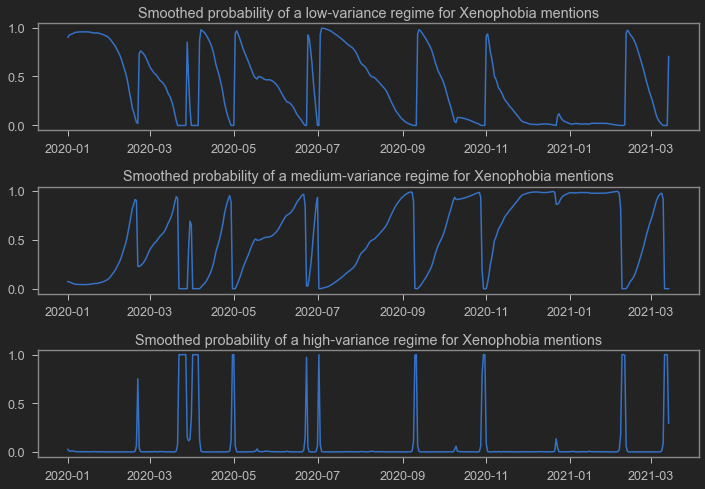

In [71]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a low-variance regime for Xenophobia mentions")

ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a medium-variance regime for Xenophobia mentions")

ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title="Smoothed probability of a high-variance regime for Xenophobia mentions")
fig.tight_layout()

## Filardo (1994) Time-Varying Transition Probabilities
3. Este modelo muestra la estimación dinámica de la probabilidad de transición entre regímenes. Esto quiere decir que el modelo actualiza las expectativas de encontrar en régimen para cada t.
$$ P(S_t = s_t|S_{t-1} = s_{t-1}) = \begin{bmatrix}
\rho_{00,t} & \rho_{10,t}\\
\rho_{01,t} & \rho_{11,t}
\end{bmatrix} $$
Donde $\rho_{ij,t}$ es la probabilidad de cambiar del régimen i al régimen j, esto se puede escribir como:
$$ \rho_{ij,t} = \dfrac{e^{x'_{t-1} \beta_{ij} } }{1 + e^{x'_{t-1} \beta_{ij} }} $$
En vez de estimar las probabilidades de transcición como parte de la máxima verosimilitud, le regresión estima los coeficientes $ \beta_{ij} $. Estos coeficientes correlacionan las probabilidades de transcición a un vector de predeterminados regresores exógenos $x_{t-1}$

In [78]:
dta_filardo = np.log(df.Xenofobia).diff() * 100
dta_filardo = dta_filardo - dta_filardo.mean()
dta_filardo = pd.DataFrame(dta_filardo)
dta_filardo["dlip"] = np.log(df.Xenofobia).diff() * 100
std_ratio = (dta_filardo["dlip"]["2020-11-01":].std() / dta_filardo["dlip"][:"2020-10-30"].std())
dta_filardo["dlip"][:"2020-10-30"] = dta_filardo["dlip"][:"2020-10-30"] * std_ratio
dta_filardo

,Xenofobia,dlip
Date,,
2020-01-01,NaN,NaN
2020-01-02,36.942590,41.602519
2020-01-03,-9.405742,-10.224170
2020-01-04,5.925219,6.918906
2020-01-05,-3.308242,-3.405948
...,...,...
2021-03-10,46.421084,46.683405
2021-03-11,244.797129,245.059450
2021-03-12,-35.802782,-35.540461


<AxesSubplot:xlabel='Date'>

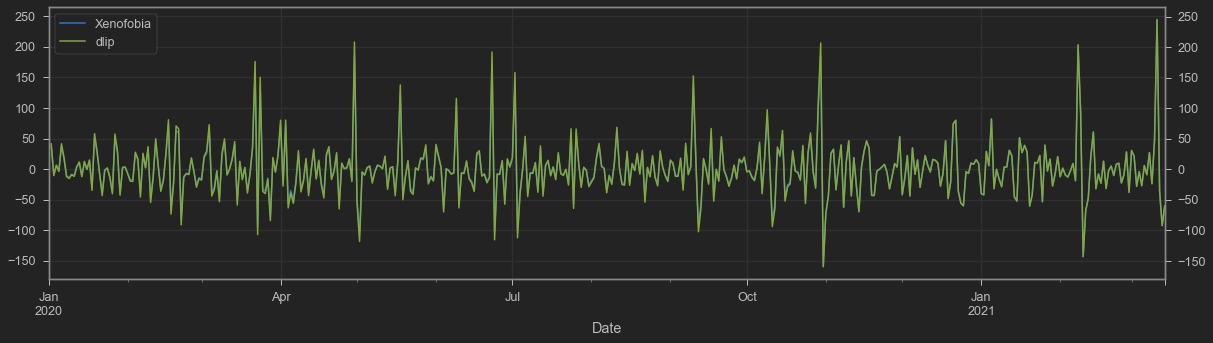

In [79]:
dta_filardo.loc[:,['Xenofobia','dlip']].plot(secondary_y=['dlip'], mark_right=False, figsize = (20,5), grid=True)

In [81]:
mod_filardo = sm.tsa.MarkovAutoregression(
    dta_filardo.iloc[2:]['dlip'],
    k_regimes=2,
    order=4,
    switching_ar=False,
    exog_tvtp=sm.add_constant(dta_filardo.iloc[1:-1]["Xenofobia"])
)
np.random.seed(12345)
res_filardo = mod_filardo.fit(search_reps=20)

In [82]:
res_filardo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                     dlip   No. Observations:                  433
Model:             MarkovAutoregression   Log Likelihood               -2241.120
Date:                  Sun, 24 Apr 2022   AIC                           4504.240
Time:                          04:42:56   BIC                           4549.018
Sample:                      01-03-2020   HQIC                          4521.917
                           - 03-14-2021                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5125      2.169      2.542      0.011       1.262       9.763
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3990      2.351     -2.297      0.022     -10.007      -0.791
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1833.1548    124.596     14.713      0.000    1588.951    2077.359
ar.L1         -0.2220      0.047     -4.676      0.000      -0.315      -0.129
ar.L2         -0.3160      0.048     -6.609      0.000      -0.410      -0.222
ar.L3         -0.2181      0.048     -4.534      0.000      -0.312      -0.124
ar.L4         -0.1615      0.049     -3.290      0.001      -0.258      -0.065
                           Regime transition parameters                          
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
p[0->0].tvtp0   243.4472        nan        nan        nan         nan         nan
p[1->0].tvtp0   403.9368   3460.843      0.117      0.907   -6379.191    7187.064
p[0->0].tvtp1  -162.7043        nan        nan        nan         nan         nan
p[1->0].tvtp1    34.5764    293.774      0.118      0.906    -541.211     610.363
=================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 1.35e+28. Standard errors may be unstable.
"""

[Text(0.5, 1.0, 'Smoothed probability of a low-frecuency xenophobia mentions')]

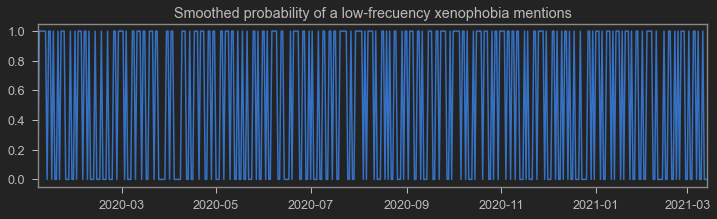

In [83]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(res_filardo.smoothed_marginal_probabilities[0])
ax.set_xlim(dta_filardo.index[6], dta_filardo.index[-1])
ax.set(title="Smoothed probability of a low-frecuency xenophobia mentions")


<AxesSubplot:title={'center':'Expected duration of a low-frecuency xenophobia mentions'}, xlabel='Date'>

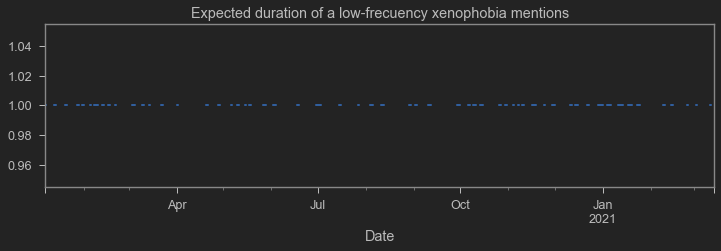

In [85]:
res_filardo.expected_durations[0].plot(
    title="Expected duration of a low-frecuency xenophobia mentions", figsize=(12, 3)
)

# Markov Switching with Monte Carlo method
Una aplicación más flexible e intuitiva que en vez de usar EM usa MCMC, la aplicación de esta metodología se hace manualmente para que pueda modificarse en el futuro.


In [15]:
df.head(5)

,Xenofobia
Date,
2020-01-01,71
2020-01-02,103
2020-01-03,94
2020-01-04,100
2020-01-05,97


In [5]:
#Function to find the steady-state probability of Markov chain
def cal_stationary_prob(prob, regime):
    # prob: 2-d array, shape = (regime, regime),Transition probability matrix
    # regime: int,Number of regimes
    
    A = np.ones((regime+1, regime))
    A[:regime, :regime] = np.eye(regime)-prob
    
    return np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)[:,-1]
#Function to calculate log-likelihood
def cal_logL(x, mu, sigma, prob, regime):
    # x: 1-d array or pandas Series,Data in chronological order
    # mu: 1=d array, len = regime,Initial value of the mean of the normal distribution that each regime follows
    # sigma: 1=d array, len = regime,Initial value of the variance of the normal distribution that each regime follows
    # prob: 2-d array, shape = (regime, regime),Transition probability matrix
    # regime: int,Number of regimes
    
    likelihood = stats.norm.pdf(x=x, loc=mu[0], scale=np.sqrt(sigma[0])).reshape(-1,1)
    for i in range(1,regime):
        likelihood = np.hstack([likelihood, stats.norm.pdf(x=x, loc=mu[i], scale=np.sqrt(sigma[i])).reshape(-1,1)])
    
    prior = cal_stationary_prob(prob, regime)
    
    logL = 0
    for i in range(length):
        temp = likelihood[i]*prior
        sum_temp = sum(temp)

        posterior = temp/sum_temp

        logL += np.log(sum_temp)
        
        prior = np.dot(prob, posterior)
        
    return logL
#A function that calculates the probability that each time point belongs to each regime
def prob_regime(x, mu, sigma, prob, regime):
    # x: 1-d array or pandas Series,Data in chronological order
    # mu: 1=d array, len = regime,Initial value of the mean of the normal distribution that each regime follows
    # sigma: 1=d array, len = regime,Initial value of the variance of the normal distribution that each regime follows
    # prob: 2-d array, shape = (regime, regime),Transition probability matrix
    # regime: int,Number of regimes
    
    likelihood = stats.norm.pdf(x=x, loc=mu[0], scale=np.sqrt(sigma[0])).reshape(-1,1)
    for i in range(1,regime):
        likelihood = np.hstack([likelihood, stats.norm.pdf(x=x, loc=mu[i], scale=np.sqrt(sigma[i])).reshape(-1,1)])
    
    prior = cal_stationary_prob(prob, regime)
    
    prob_list = []
    for i in range(length):
        temp = likelihood[i]*prior

        posterior = temp/sum(temp)
        
        prob_list.append(posterior)
        
        prior = np.dot(prob, posterior)
    
    return np.array(prob_list)
#Function to generate parameters to update in MCMC
def create_next_theta(mu, sigma, gen_prob, epsilon, regime):
    # mu: 1=d array, len = regime,Initial value of the mean of the normal distribution that each regime follows
    # sigma: 1=d array, len = regime,Initial value of the variance of the normal distribution that each regime follows
    # gen_prob: 2-d array, shape = (regime, regime),Logistic function arguments
    # epsilon: float,Update width of the proposed parameter
    # regime: int,Number of regimes
    
    new_mu = mu.copy()
    new_sigma = sigma.copy()
    new_gen_prob = gen_prob.copy()
    
    new_mu += (2*np.random.rand(regime)-1)*epsilon
    new_mu = np.sort(new_mu)
    new_sigma = np.exp(np.log(new_sigma) + (2*np.random.rand(regime)-1)*epsilon)
    #try:
    new_sigma = np.sort(new_sigma)[[3,2,0,1]]
    #except:
        #new_sigma = np.sort(new_sigma)[[2,0,1]]
    new_gen_prob += (2*np.random.rand(regime,regime)-1)*epsilon*0.1

    new_gen_prob = new_gen_prob - np.diag(np.diag(new_gen_prob))
    new_prob = np.exp(new_gen_prob)/(1+np.exp(new_gen_prob))
    new_prob = new_prob + np.diag(1-np.dot(new_prob.T,np.ones((regime,1))).flatten())
    
    return new_mu, new_sigma, new_gen_prob, new_prob
#Function that executes MCMC
def mcmc(x, mu, sigma, gen_prob, prob, epsilon, trial, regime):
    # x: 1-d array or pandas Series,Data in chronological order
    # mu: 1=d array, len = regime,Initial value of the mean of the normal distribution that each regime follows
    # sigma: 1=d array, len = regime,Initial value of the variance of the normal distribution that each regime follows
    # gen_prob: 2-d array, shape = (regime, regime),Logistic function arguments
    # epsilon: float,Update width of the proposed parameter
    # trial: int,MCMC execution count
    # regime: int,Number of regimes
    
    mu_list = []
    sigma_list = []
    prob_list = []
    logL_list = []
    mu_list.append(mu)
    sigma_list.append(sigma)
    prob_list.append(prob)
    
    for i in tqdm(range(trial)):
        new_mu, new_sigma, new_gen_prob, new_prob = create_next_theta(mu, sigma, gen_prob, epsilon, regime)
        
        logL = cal_logL(x, mu, sigma, prob, regime)
        next_logL = cal_logL(x, new_mu, new_sigma, new_prob, regime)
        
        ratio = np.exp(next_logL-logL)
        logL_list.append(logL)

        if ratio > 1:
            mu, sigma, gen_prob, prob = new_mu, new_sigma, new_gen_prob, new_prob

        elif ratio > np.random.rand():
            mu, sigma, gen_prob, prob = new_mu, new_sigma, new_gen_prob, new_prob

        mu_list.append(mu)
        sigma_list.append(sigma)
        prob_list.append(prob)
            
        if i%1500==0:
            print(logL)
    
    return np.array(mu_list), np.array(sigma_list), np.array(prob_list), np.array(logL_list)

In [6]:
# Métricas de inicio de 3 regímenes
# Régimen 1
print(df["2020-01-01":"2020-05-01"].mean())
print(df["2020-01-01":"2020-05-01"].std())
# Régimen 2
print(df["2020-05-01":"2020-10-01"].mean())
print(df["2020-05-01":"2020-10-01"].std())
# Régimen 3
print(df["2020-10-01":].mean())
print(df["2020-10-01":].std())

Xenofobia    184.590164
dtype: float64
Xenofobia    149.127366
dtype: float64
Xenofobia    130.181818
dtype: float64
Xenofobia    66.133007
dtype: float64
Xenofobia    165.072727
dtype: float64
Xenofobia    231.692647
dtype: float64


In [7]:
# Iniciación de parámetros (régimen y parámetros de la distribución normal)
regime = 4
mu = [2000, 1000, 500, 165]
sigma = [1500, 750, 350, 231]
gen_prob = np.ones((regime,regime))*(-4)
gen_prob = gen_prob - np.diag(np.diag(gen_prob))
#Diagonal component is 0, off-diagonal component is-Square matrix of 3

prob = np.exp(gen_prob)/(1+np.exp(gen_prob))
#Apply logistic function
prob = prob + np.diag(1-np.dot(prob.T,np.ones((regime,1))).flatten())
#As a complementary event of the off-diagonal component, the probability of the diagonal component is obtained and used as a transition probability matrix.
trial = 25000
length = 439
epsilon = 0.1
mu_list, sigma_list, prob_list, logL_list = mcmc(df, mu, sigma, gen_prob, prob, epsilon, trial, regime)

  0%|          | 0/25000 [00:00<?, ?it/s]

C:\Users\JOSE\AppData\Local\Temp/ipykernel_9960/3196905728.py:111: RuntimeWarning: overflow encountered in exp
  ratio = np.exp(next_logL-logL)


-5350.0267863605995
-2606.6437040325595
-2605.6721106864275
-2597.6498111934284
-2591.465600431945
-2587.6005137258976
-2585.890723853563
-2578.648464461656
-2576.519401953836
-2582.5016118489166
-2577.616284974872
-2571.815602714863
-2572.4067758451333
-2568.6903801542317
-2567.019552694196
-2562.2677572086427
-2556.9792354986484


In [8]:
prob_series = prob_regime(df, mu_list[-1], sigma_list[-1], prob_list[-1], regime)

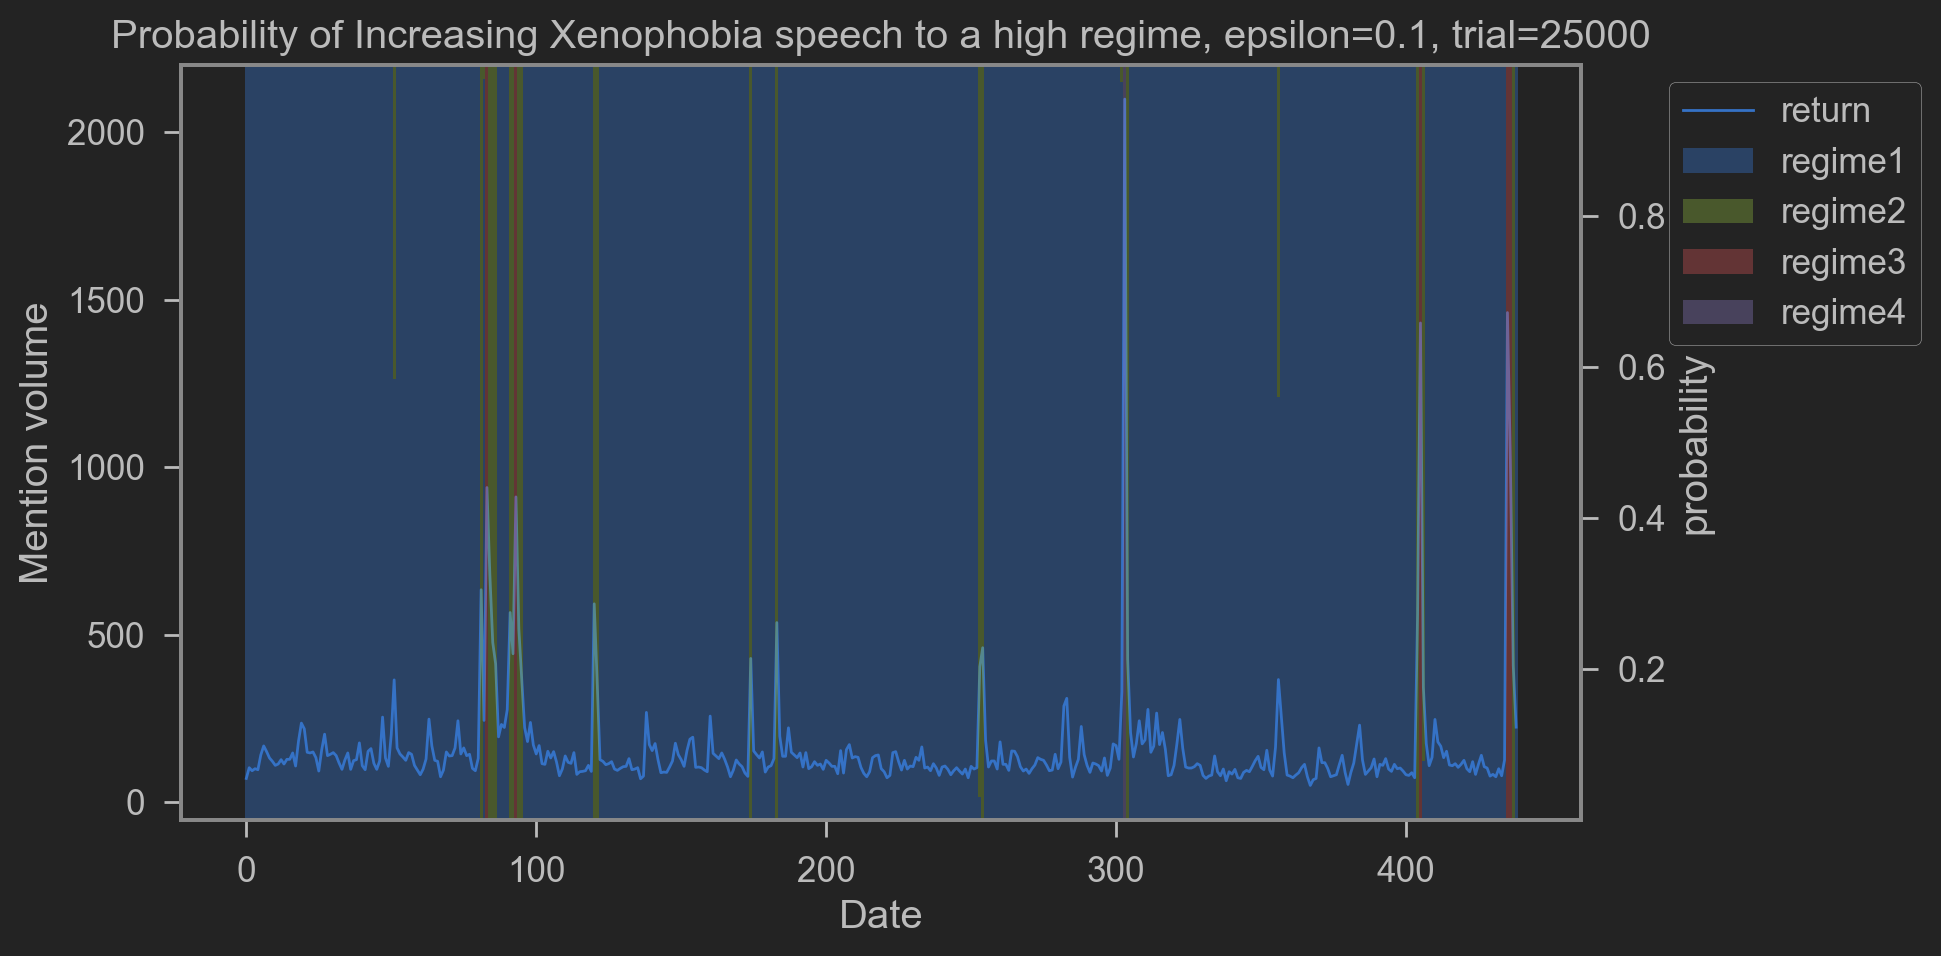

In [9]:
fig = plt.figure(figsize=(10,5),dpi=200)
ax1 = fig.add_subplot(111)
ax1.plot(range(length), df, linewidth = 1.0, label="return")

ax2 = ax1.twinx()
for i in range(regime):
    ax2.bar(range(length), prob_series[:,i], width=1.0, alpha=0.4, label=f"regime{i+1}", bottom=prob_series[:,:i].sum(axis=1))

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, bbox_to_anchor=(1.05, 1), loc='upper left')

ax1.set_xlabel('Date')
ax1.set_ylabel(r'Mention volume')
ax2.set_ylabel(r'probability')
ax1.set_title(f"Probability of Increasing Xenophobia speech to a high regime, epsilon={epsilon}, trial={trial}")

plt.subplots_adjust(left = 0.1, right = 0.8)
#plt.savefig("probability_regime2.png ")
plt.show()